In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Airline_Delay_Cause.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",85.0,8.0,4.00,0.49,...,0.0,0.00,2.0,0.0,417.0,245.0,35.0,137.0,0.0,0.0
1,2024,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",85.0,16.0,7.98,2.00,...,0.0,3.88,1.0,1.0,864.0,396.0,168.0,98.0,0.0,202.0
2,2024,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",178.0,23.0,10.96,1.36,...,0.0,5.35,6.0,1.0,1219.0,592.0,40.0,169.0,0.0,418.0
3,2024,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",82.0,18.0,7.06,0.00,...,0.0,6.85,5.0,0.0,988.0,416.0,0.0,172.0,0.0,400.0
4,2024,8,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1919.0,215.0,67.74,8.05,...,0.0,97.49,40.0,1.0,20110.0,9418.0,896.0,2047.0,0.0,7749.0


In [4]:
data.shape

(15060, 21)

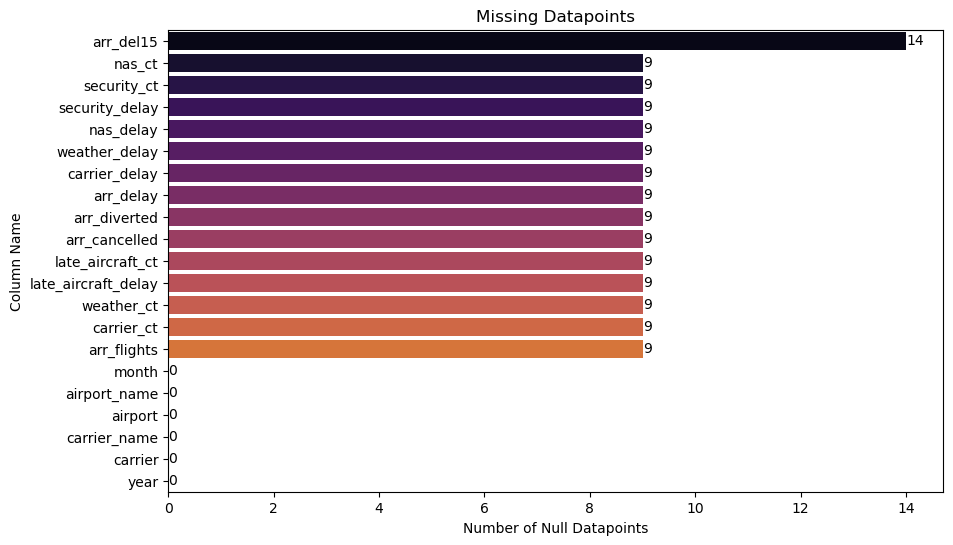

In [5]:
missing_data = data.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_data.values, y=missing_data.index, palette="inferno",hue = missing_data.index)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title("Missing Datapoints")
plt.xlabel("Number of Null Datapoints")
plt.ylabel("Column Name")
plt.show()

### #Observations v/s. Airport

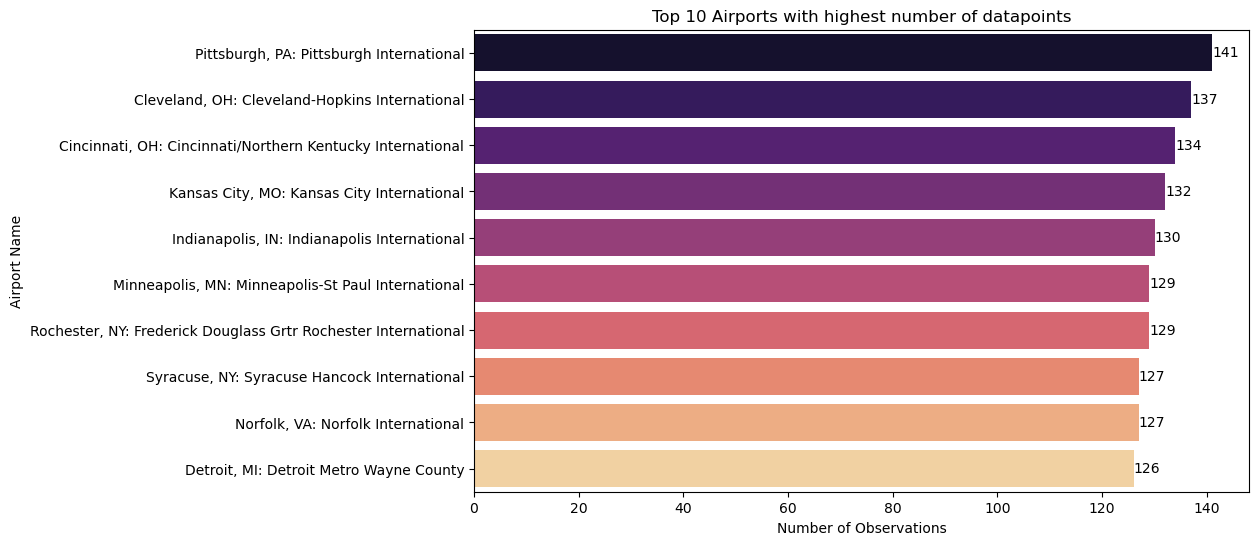

In [6]:
total_airports_largest = data.airport_name.value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=total_airports_largest.values, y=total_airports_largest.index, palette="magma",hue = total_airports_largest.index)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title("Top 10 Airports with highest number of datapoints")
plt.xlabel("Number of Observations")
plt.ylabel("Airport Name")
plt.show()

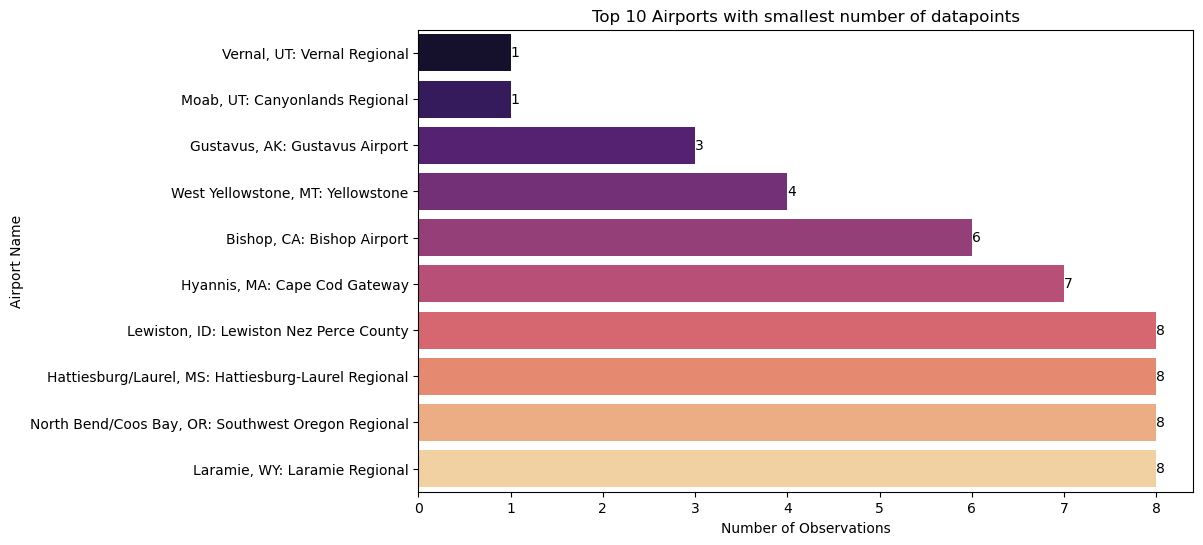

In [7]:
total_airports_smallest = data.airport_name.value_counts().nsmallest(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=total_airports_smallest.values, y=total_airports_smallest.index, palette="magma",hue = total_airports_smallest.index,legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title("Top 10 Airports with smallest number of datapoints")
plt.xlabel("Number of Observations")
plt.ylabel("Airport Name")
plt.show()

### Delays v/s. Airport

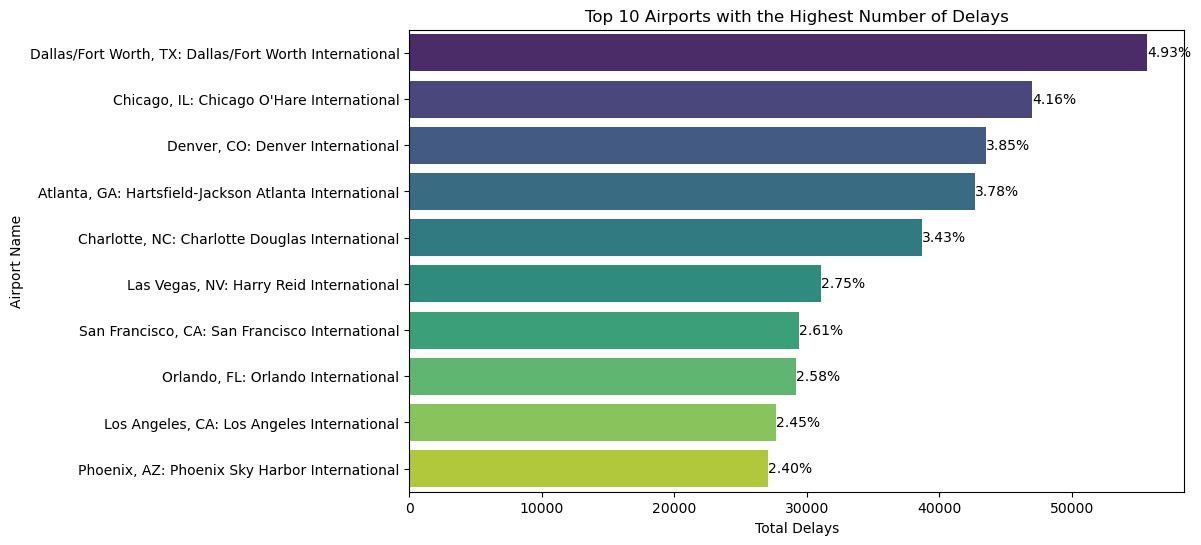

In [8]:
top_delayed_airports = data.groupby('airport_name')['arr_del15'].sum().nlargest(10)
total_delays = data['arr_del15'].sum()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_delayed_airports.values, y=top_delayed_airports.index, palette="viridis",hue = top_delayed_airports.index)

for container in ax.containers:
    percentages = [(val / total_delays) * 100 for val in container.datavalues]
    ax.bar_label(container, labels=[f'{p:.2f}%' for p in percentages], label_type='edge', fontsize=10)

plt.title("Top 10 Airports with the Highest Number of Delays")
plt.xlabel("Total Delays")
plt.ylabel("Airport Name")
plt.show()

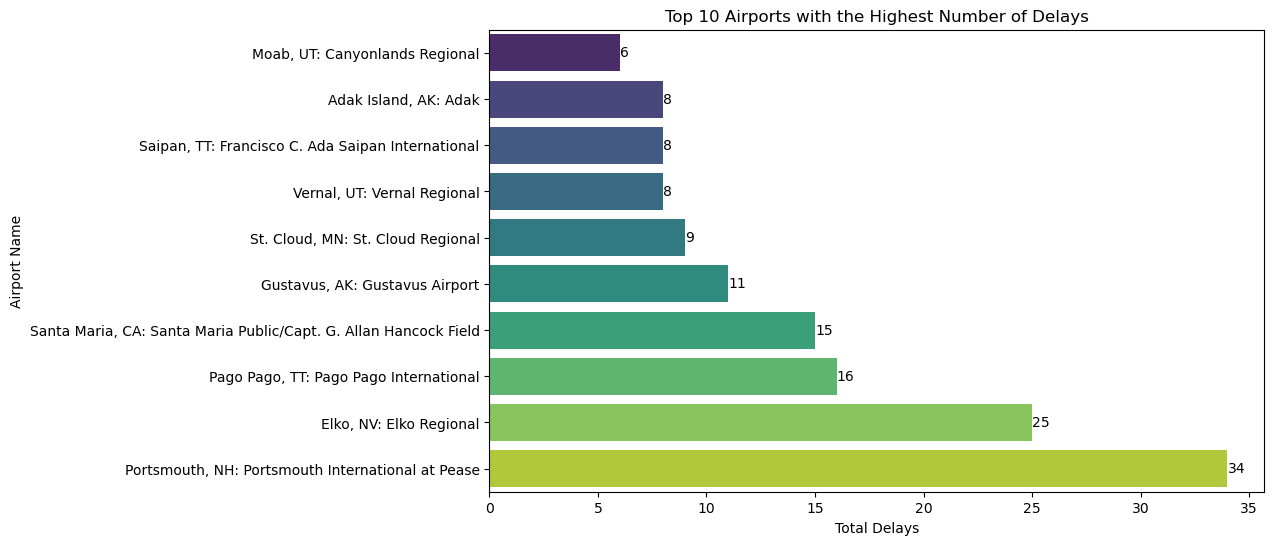

In [9]:
top_delayed_airports = data.groupby('airport_name')['arr_del15'].sum().nsmallest(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_delayed_airports.values, y=top_delayed_airports.index, palette="viridis",hue = top_delayed_airports.index)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title("Top 10 Airports with the Highest Number of Delays")
plt.xlabel("Total Delays")
plt.ylabel("Airport Name")
plt.show()

### Monthly Delays

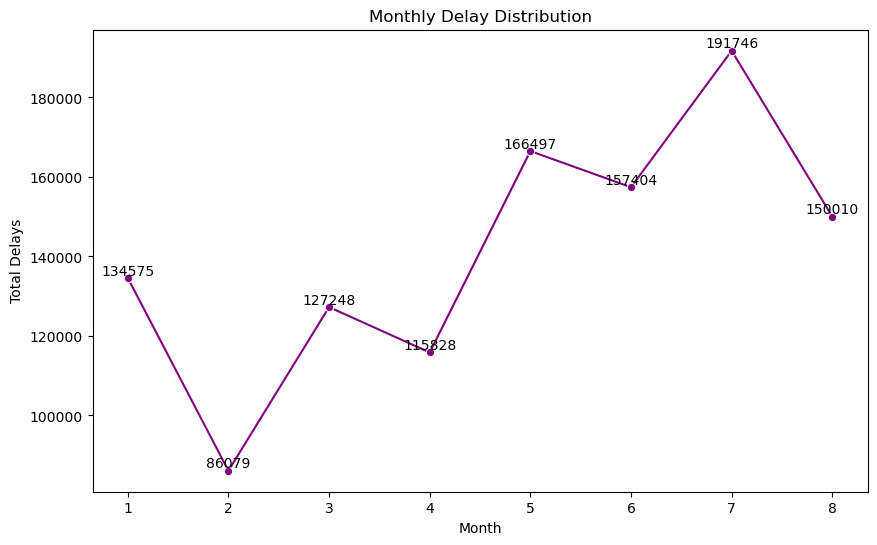

In [10]:
monthly_delays = data.groupby('month')['arr_del15'].sum()

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=monthly_delays.index, y=monthly_delays.values, marker='o', color="purple")

for x, y in zip(monthly_delays.index, monthly_delays.values):
    ax.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10)

plt.title("Monthly Delay Distribution")
plt.xlabel("Month")
plt.ylabel("Total Delays")
plt.show()


### Delays v/s. Carriers


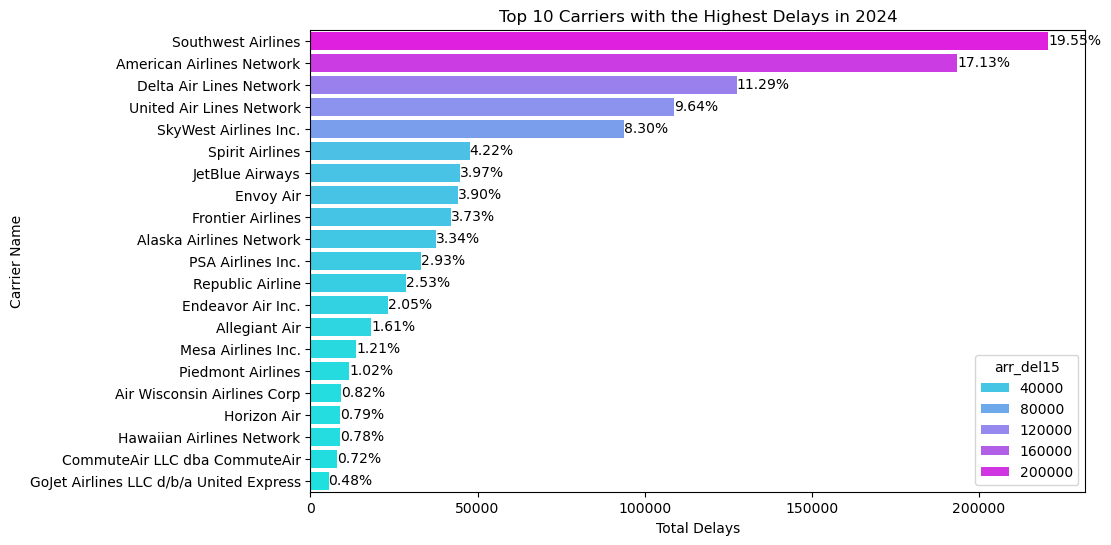

In [11]:
top_delayed_carriers_2024 = data.groupby('carrier_name')['arr_del15'].sum().sort_values(ascending=False)
total_delays = data['arr_del15'].sum()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_delayed_carriers_2024.values, y=top_delayed_carriers_2024.index, palette="cool",hue=top_delayed_carriers_2024)

for container in ax.containers:
    percentages = [(val / total_delays) * 100 for val in container.datavalues]
    ax.bar_label(container, labels=[f'{p:.2f}%' for p in percentages], label_type='edge', fontsize=10)

plt.title("Top 10 Carriers with the Highest Delays in 2024")
plt.xlabel("Total Delays")
plt.ylabel("Carrier Name")
plt.show()

### Delay Causes

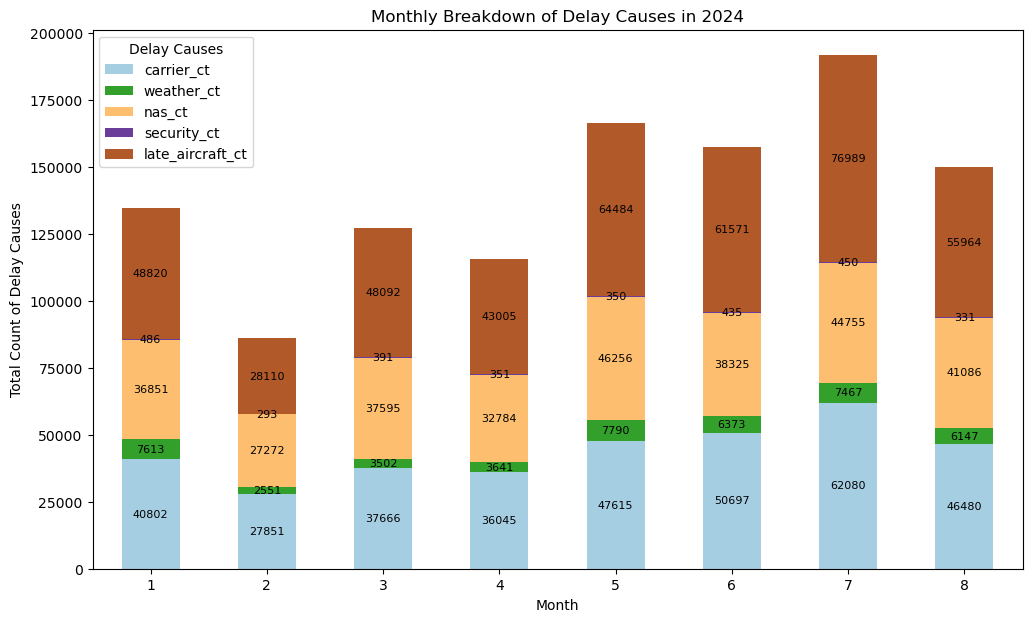

In [12]:
monthly_delay_causes = data.groupby('month')[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()

ax = monthly_delay_causes.plot(kind='bar', stacked=True, figsize=(12, 7), colormap="Paired")

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d', fontsize = 8)

plt.title("Monthly Breakdown of Delay Causes in 2024")
plt.xlabel("Month")
plt.ylabel("Total Count of Delay Causes")
plt.xticks(rotation=0)
plt.legend(title="Delay Causes")
plt.show()